In [1]:
import pandas as pd
import numpy as np

prediction_path = 'output/predictions/multiviewv9/'

In [2]:
df = pd.read_csv(prediction_path+"test_Q1_multiviewv10_seed289.csv")

In [3]:
df.head()

,Unique_ID,AC_pred,CO_pred,LA_pred,ST_pred,Response_true,AC_true,CO_true,LA_true,ST_true,total_true,total_pred
0,6817958868,2.0,2.0,2.0,2.0,Hello there! My name is Joseph Mang and i'm fr...,2,1,2,2,7,8.0
1,6814214682,2.0,3.0,3.0,2.0,Hello Anahera quinn i am Rokena butcher i am f...,2,3,3,3,11,10.0
2,6810653345,3.0,3.0,3.0,3.0,"Dear Anahera Quinn, I am interested in signing...",3,3,3,3,12,12.0
3,6773279851,3.0,3.0,3.0,3.0,"Kia Ora Anahera Quinn, \nMy name is Isadora Ah...",3,2,3,3,11,12.0
4,6895156445,3.0,3.0,3.0,3.0,October 31st 2023\n \n11:28\n \n \nTo: Anahera...,2,2,3,3,10,12.0


In [4]:
df.shape

(346, 12)

In [6]:
# Calculate min and max by subtracting and adding 0.3, respectively
min_val = round(df[['AC']] - 0.1)
max_val = round(df[['AC']] + 0.1)

min_val

KeyError: "None of [Index(['AC'], dtype='object')] are in the [columns]"

In [57]:
max_val.loc[1]

AC    2.0
Name: 1, dtype: float64

In [58]:
# Iterate over the DataFrame index
for i in df.index:
    if min_val.loc[i].equals(max_val.loc[i]):
        df.at[i, 'AC_RANGE'] = min_val.loc[i].values[0]
    else:
        df.at[i, 'AC_RANGE'] = str([min_val.loc[i].values[0], max_val.loc[i].values[0]])


In [59]:
df.head()

,Unique_ID,AC,CO,LA,ST,AC_RANGE
0,6831925658,2.948024,3.158209,3.203347,3.217326,3.0
1,6813875597,2.232285,2.653294,2.632966,2.535596,2.0
2,6810896752,2.453379,2.997998,2.920905,2.844583,"[2.0, 3.0]"
3,6831927625,3.083962,3.241235,3.295425,3.319744,3.0
4,6814716446,0.600000,0.600000,0.600000,0.600000,1.0


In [60]:
df.to_csv("test_Q2_ac_range.csv")

In [61]:
#filter out the single values in AC_Range
single_values_df = df[df['AC_RANGE'].apply(lambda x: isinstance(x, (float, int, np.float64, np.int64)))].copy()
single_values_df

,Unique_ID,AC,CO,LA,ST,AC_RANGE
0,6831925658,2.948024,3.158209,3.203347,3.217326,3.0
1,6813875597,2.232285,2.653294,2.632966,2.535596,2.0
3,6831927625,3.083962,3.241235,3.295425,3.319744,3.0
4,6814716446,0.600000,0.600000,0.600000,0.600000,1.0
5,6820794835,2.350857,2.819564,2.739203,2.703454,2.0
...,...,...,...,...,...,...
340,6691193921,0.000000,0.000000,0.000000,0.000000,-0.0
341,6813826539,0.000000,0.000000,0.000000,0.000000,-0.0
342,6810173574,0.000000,0.000000,0.000000,0.000000,-0.0
343,6813494267,0.000000,0.000000,0.000000,0.000000,-0.0


In [9]:
test = pd.read_csv('data/nzqa/Test/test_S2Q2_with_score.csv')

In [63]:
dt = pd.merge(single_values_df,test, left_on="Unique_ID", right_on="Unique_ID", how="inner")

In [5]:
dt = df.copy()
dt.head()

,Unique_ID,AC_pred,CO_pred,LA_pred,ST_pred,Response_true,AC_true,CO_true,LA_true,ST_true,total_true,total_pred
0,6817958868,2.0,2.0,2.0,2.0,Hello there! My name is Joseph Mang and i'm fr...,2,1,2,2,7,8.0
1,6814214682,2.0,3.0,3.0,2.0,Hello Anahera quinn i am Rokena butcher i am f...,2,3,3,3,11,10.0
2,6810653345,3.0,3.0,3.0,3.0,"Dear Anahera Quinn, I am interested in signing...",3,3,3,3,12,12.0
3,6773279851,3.0,3.0,3.0,3.0,"Kia Ora Anahera Quinn, \nMy name is Isadora Ah...",3,2,3,3,11,12.0
4,6895156445,3.0,3.0,3.0,3.0,October 31st 2023\n \n11:28\n \n \nTo: Anahera...,2,2,3,3,10,12.0


In [6]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'dt' is a DataFrame and 'Q2_AC' is your true labels column
y_true = dt['Q2_AC']

# Convert the predictions to integer if needed
predictions = dt['AC_RANGE'].apply(lambda x: int(x) if isinstance(x, (float, int)) else x[0] if isinstance(x, list) else None)

# Filter out any rows with None in predictions
valid_rows = predictions.notnull()
y_true = y_true[valid_rows]
predictions = predictions[valid_rows]

# Generate the confusion matrix
cm = confusion_matrix(y_true, predictions, labels=[x for x in range(0, 5)])

# Plot the confusion matrix
draw_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(0, 5)])
plt.figure(figsize=(10, 6))
draw_cm.plot()
plt.title('AC confusion matrix for Q2 ')
plt.show()


KeyError: 'Q2_AC'

C:\Users\JessieDong\AppData\Local\Temp\ipykernel_24368\3197618673.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions[predictions==-1]=0


<Figure size 1000x600 with 0 Axes>

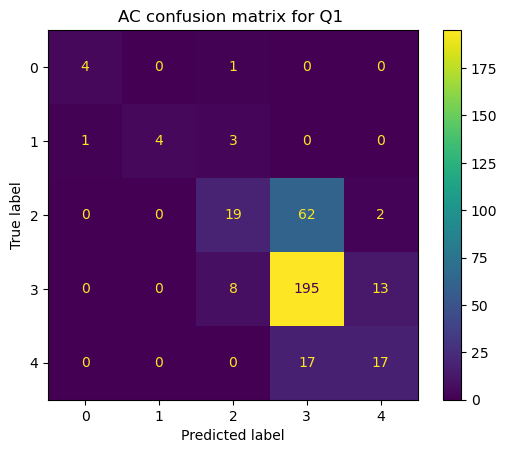

In [9]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'dt' is a DataFrame and 'Q2_AC' is your true labels column
y_true = dt['CO_true']

# # Convert the predictions to integer if needed
# predictions = dt['AC_RANGE'].apply(lambda x: int(x) if isinstance(x, (float, int)) else x[0] if isinstance(x, list) else None)

# # Filter out any rows with None in predictions
# valid_rows = predictions.notnull()
# y_true = y_true[valid_rows]
# predictions = predictions[valid_rows]
predictions=dt['CO_pred']
#change the -1 to 0
predictions[predictions==-1]=0
#Generate the confusion matrix
cm = confusion_matrix(y_true, predictions, labels=[x for x in range(0, 5)])

# Plot the confusion matrix
draw_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(0, 5)])
plt.figure(figsize=(10, 6))
draw_cm.plot()
plt.title('AC confusion matrix for Q1 ')
plt.show()


In [10]:
kappa = round(cohen_kappa_score(y_true,predictions, weights='quadratic'), 3)
kappa

0.623

In [13]:
df_float = pd.read_csv(prediction_path+"test_Q1_multiviewv10_seed289_float.csv")
df_float.head()

,Unique_ID,AC_pred_float,CO_pred_float,LA_pred_float,ST_pred_float
0,6817958868,1.771773,1.872119,1.785109,1.841751
1,6814214682,2.035825,2.532464,2.611050,2.378394
2,6810653345,2.936047,3.012954,3.049076,3.017570
3,6773279851,2.817183,2.947507,2.974478,2.957670
4,6895156445,2.602109,2.933768,2.996772,3.030466


In [19]:
predictions_float = df_float['ST_pred_float']
predictions_float[predictions_float==-1]=0
y_true = dt['ST_true']

C:\Users\JessieDong\AppData\Local\Temp\ipykernel_24368\3590290332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_float[predictions_float==-1]=0


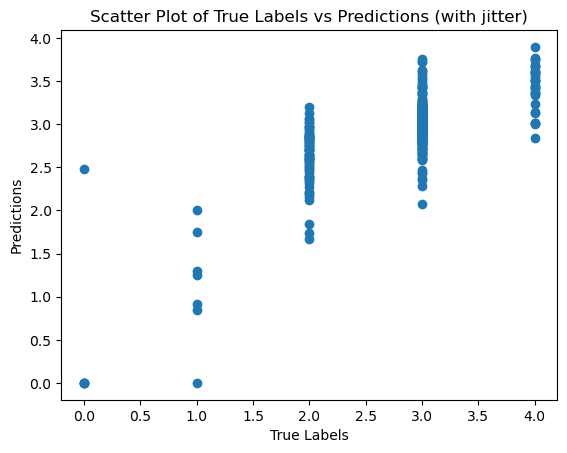

In [35]:
# import random

# # Define the amount of jitter
# jitter_amount = 0.15

# # Jitter the data points
# jittered_y_true = y_true + np.random.uniform(-jitter_amount, jitter_amount, len(y_true))
# jittered_predictions_float = predictions_float + np.random.uniform(-jitter_amount, jitter_amount, len(predictions_float))

# Plot the jittered data points
#plt.scatter(jittered_y_true, jittered_predictions_float)
plt.scatter(y_true, predictions_float)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Labels vs Predictions (with jitter)')
plt.show()

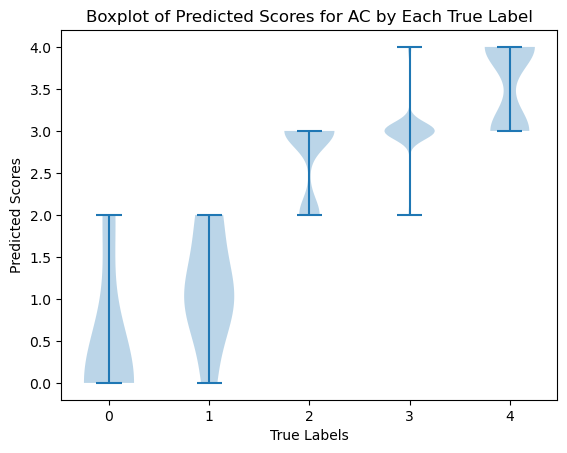

In [21]:
plt.violinplot([predictions[y_true == label] for label in range(5)])
plt.xlabel('True Labels')
plt.ylabel('Predicted Scores')
plt.title('Boxplot of Predicted Scores for AC by Each True Label')
plt.xticks(range(1, 6), ['0', '1', '2', '3', '4'])
plt.show()

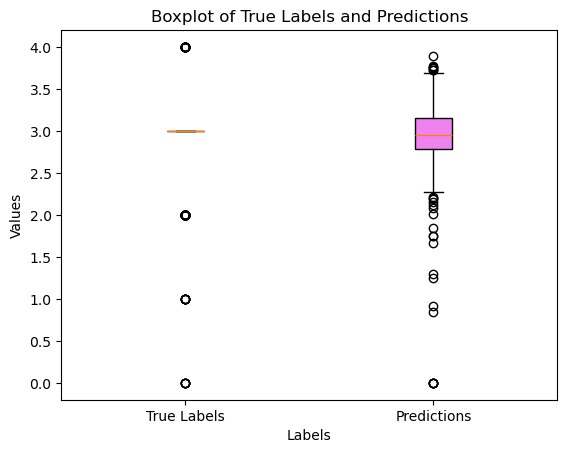

In [22]:
plt.boxplot([y_true, predictions_float], labels=['True Labels', 'Predictions'], patch_artist=True, boxprops=dict(facecolor='violet'))
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Boxplot of True Labels and Predictions')
plt.show()